# Ejercicios Datos

In [1]:
import numpy as np
import pandas as pd

---

## Parte I

### Adquisición y guardado de datos.

- Lee los datos del fichero train.txt.

In [2]:
data = pd.read_csv('data/train.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Cambia algunos de los datos y escribe el fichero train_mod.csv.

In [7]:
data.iloc[2:20, 5:10] = 0

In [8]:
data.to_csv('tmp/train_mod.csv')

In [11]:
pd.read_csv('tmp/train_mod.csv').head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,0.0,0,0,0,0.0000,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.0,0,0,0,0.0000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,0.0,0,0,0,0.0000,NaN,S


### Limpieza y preparación de datos.

- Carga el fichero  train.csv.

In [14]:
data = pd.read_csv('data/train.csv')

- Elimina todas las filas con NaN.

In [15]:
data.dropna(axis=0, inplace=True)

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


- Elimina todos los registros donde la edad sea superior al tercer cuartil de esta.

In [19]:
data.Age.quantile(q=0.75)

47.5

In [18]:
data.Age < data.Age.quantile(q=0.75)

1       True
3       True
6      False
10      True
11     False
       ...  
871     True
872     True
879    False
887     True
889     True
Name: Age, Length: 183, dtype: bool

In [31]:
data_tr_q = data.loc[data.Age < data.Age.quantile(q=0.75)]

In [32]:
data_tr_q.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [24]:
data.shape

(183, 12)

In [25]:
data_tr_q.shape

(137, 12)

---

## Parte II

### Operaciones de combinar, juntar y agrupar.

- Calula el número de pasajeros por clase.

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data[['Pclass','PassengerId']].groupby('Pclass').count()

,PassengerId
Pclass,
1,216
2,184
3,491


- Calula la edad media de los supervivientes y los no supervivientes.

In [5]:
data[['Survived', 'Age']].groupby('Survived').mean()

,Age
Survived,
0,30.626179
1,28.343690


- Calula el porcentaje de supervientes por edad.

In [9]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
data_age = data[['Age', 'Survived']]

In [20]:
data_age.index = data['Age']
data_age.drop(['Age'], inplace=True, axis=1)

C:\Users\franc\Miniconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
data_age

,Survived
Age,
22.0,0
38.0,1
26.0,1
35.0,1
35.0,0
...,...
27.0,0
19.0,1
NaN,0


In [23]:
data_age.groupby(lambda x: x//10)

In [15]:
dict_edades = {}
for grupo, data_grupo in data.groupby(['Age']):
    pct_sur = (data_grupo.Survived == 1).sum() / data_grupo.shape[0]*100
    dict_edades[grupo] = pct_sur

In [26]:
dict_edades = {}
for grupo, data_grupo in data_age.groupby(lambda x: x//10*10):
    pct_sur = (data_grupo.Survived == 1).sum() / data_grupo.shape[0]*100
    dict_edades[grupo] = pct_sur

In [27]:
dict_edades

{0.0: 61.29032258064516,
 10.0: 40.19607843137255,
 20.0: 35.0,
 30.0: 43.712574850299404,
 40.0: 38.20224719101123,
 50.0: 41.66666666666667,
 60.0: 31.57894736842105,
 70.0: 0.0,
 80.0: 100.0}

In [32]:
data_age.groupby(lambda x: x//10*10).mean()*100

,Survived
0.0,61.290323
10.0,40.196078
20.0,35.000000
30.0,43.712575
40.0,38.202247
50.0,41.666667
60.0,31.578947
70.0,0.000000
80.0,100.000000


- Crea un gráfico de barras de los datos anteriores.

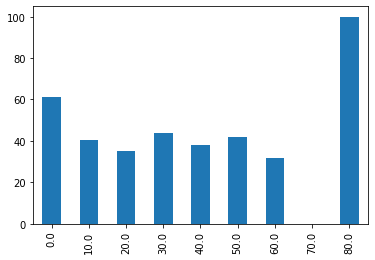

In [33]:
pd.Series(dict_edades).plot.bar()

In [34]:
pd.Series(dict_edades).groupby(lambda x: x//5*5).mean()

0.0      61.290323
10.0     40.196078
20.0     35.000000
30.0     43.712575
40.0     38.202247
50.0     41.666667
60.0     31.578947
70.0      0.000000
80.0    100.000000
dtype: float64

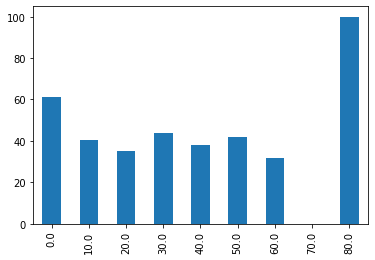

In [35]:
_.plot.bar()

- Crea una tabla pivote con supervivientes como índice, la clase como columnas y la media de edad.

In [36]:
pd.pivot_table(data, 
               values='Age', 
               index=['Survived'], 
               columns=['Pclass'], 
               aggfunc=np.mean)

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


In [42]:
data.groupby(['Sex', 'Pclass']).Survived.mean()*100

Sex     Pclass
female  1         96.808511
        2         92.105263
        3         50.000000
male    1         36.885246
        2         15.740741
        3         13.544669
Name: Survived, dtype: float64